In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
# Categoricl Missing Values
features= dataset.columns
categorical_features=[]
for x in features:
    if dataset[x].dtype == 'O':
        categorical_features.append(x)



In [5]:
def categorical_missing_values(dataset,categorical_features):
    data=dataset.copy()
    x1=[]
    for x in categorical_features:
        if data[x].isnull().sum()>1:
            x1.append(x)
    
    data[x1]=data[x1].fillna('Missing')
    return data

data=categorical_missing_values(dataset,categorical_features)

        


In [6]:
# Numerical Null filling
numerical_feature=[]
for x in features:
    if dataset[x].dtype != 'O':
        numerical_feature.append(x)

def numerical_null(dataset,numerical_feature):
    x2=[]
    data=dataset.copy()
    for x in numerical_feature:
        if data[x].isnull().sum()>1:
            x2.append(x)

    for xx in x2:
        median = data[xx].median()
        data[xx+'nan']=np.where(data[xx].isnull(), 1,0)
        data[xx].fillna(median, inplace=True)
    
    return data

data= numerical_null(data,numerical_feature)

In [7]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Missing,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missin

In [8]:
#Temporal features
Temporal_features=[]
for num in numerical_feature:
    if 'Yr' in num or'Year' in num:
        Temporal_features.append(num)


In [9]:
for temp in Temporal_features:
    if temp != 'YrSold':
        data[temp]=data['YrSold']-data[temp]

In [10]:
Cont_numerical_features=[]
for log in numerical_feature:
    if len(data[log].unique())>25 and log not in Temporal_features +['Id']:
        Cont_numerical_features.append(log)



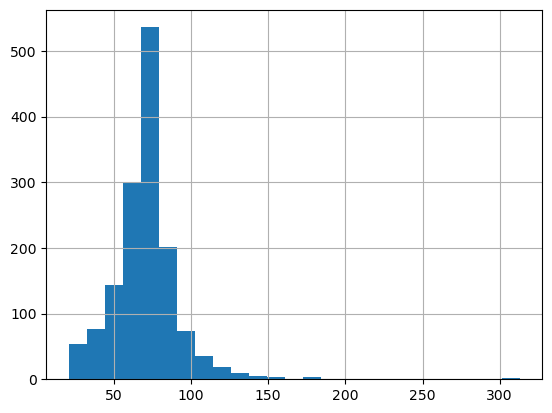

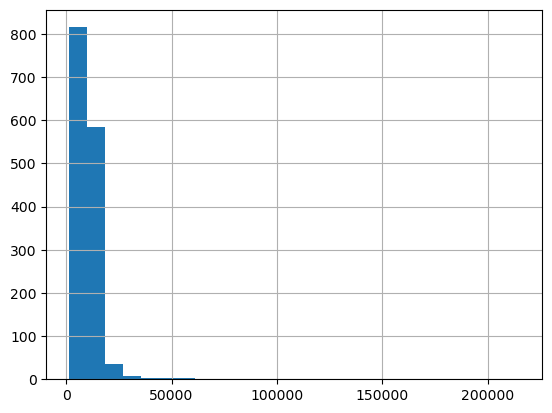

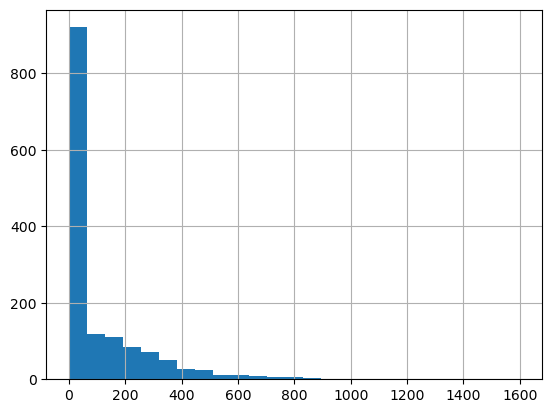

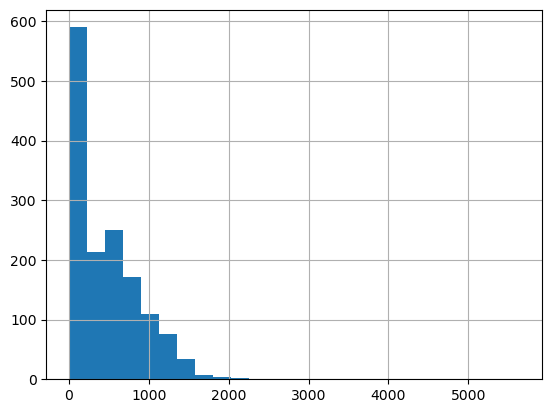

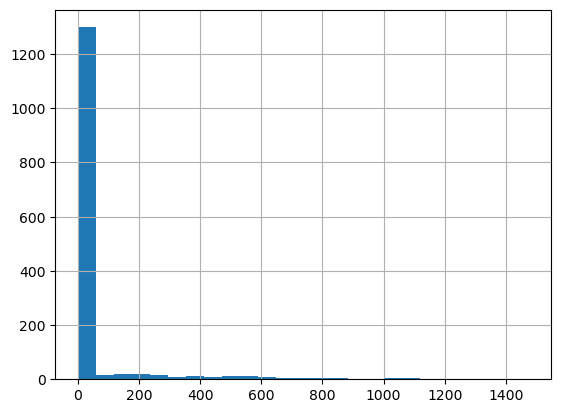

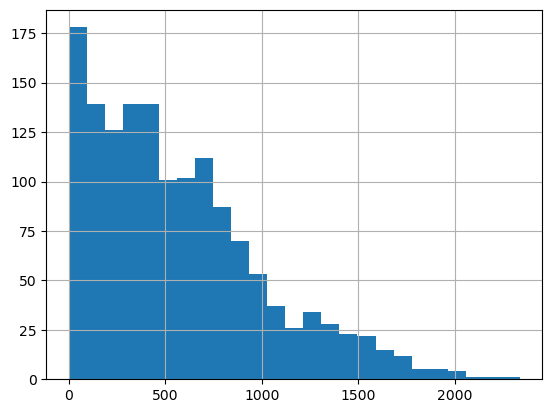

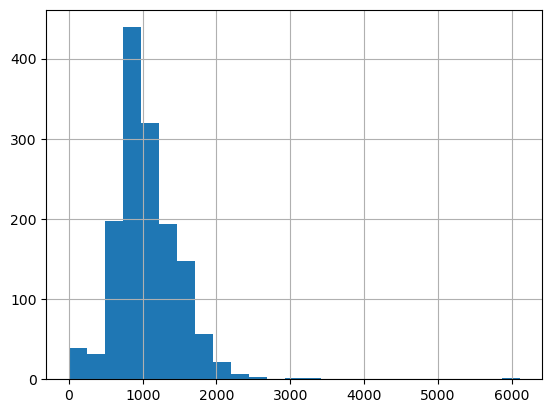

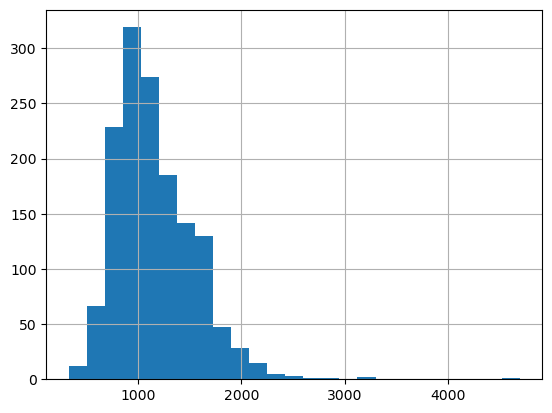

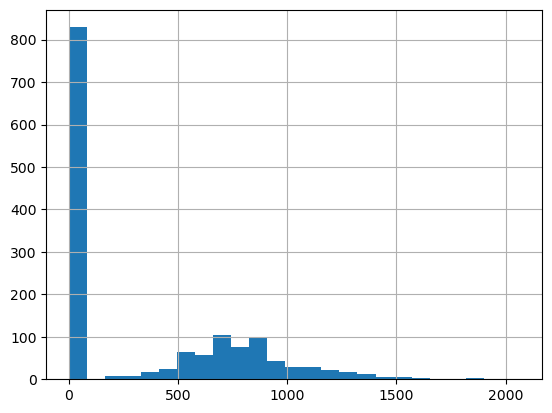

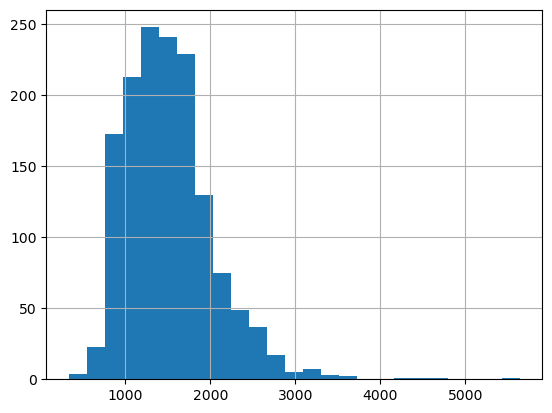

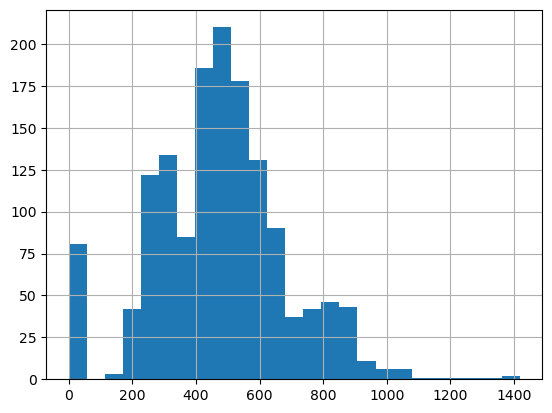

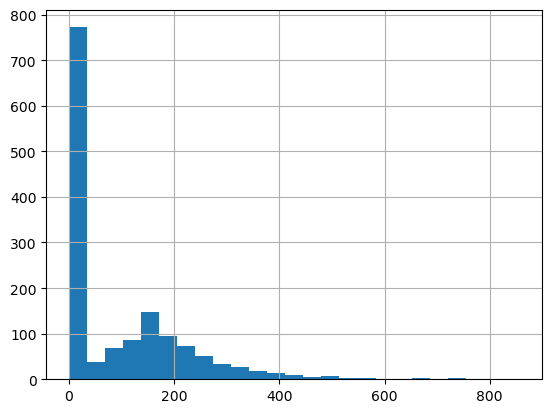

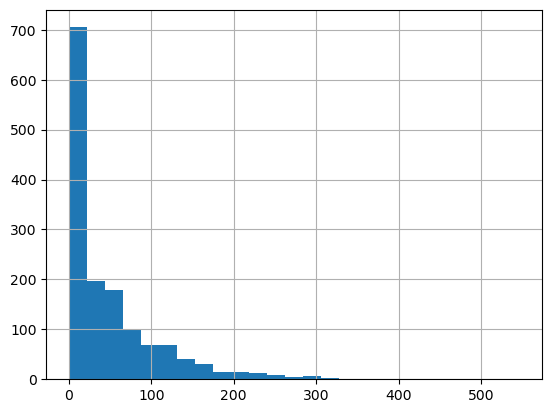

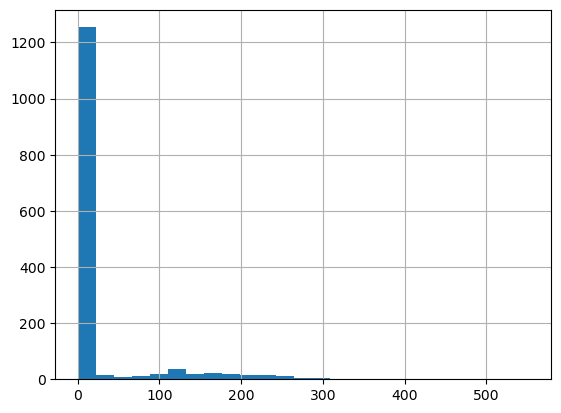

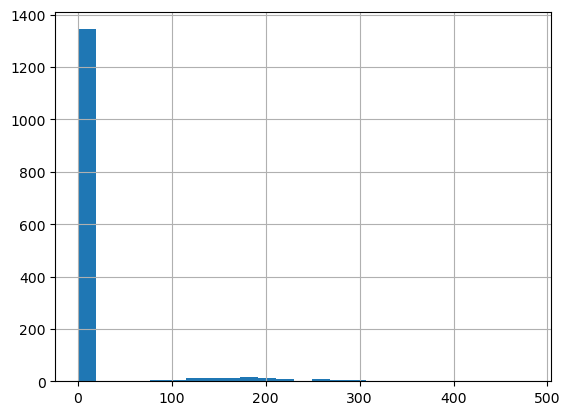

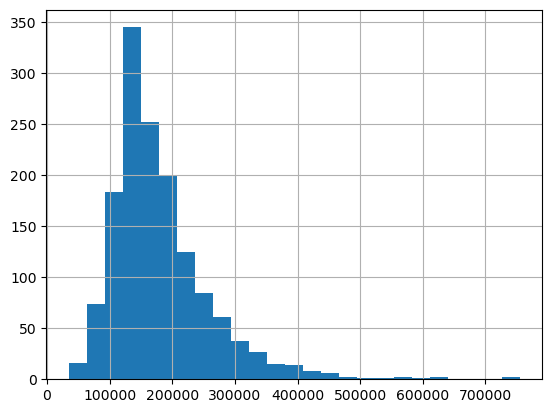

In [11]:
for xx in Cont_numerical_features:
    data[xx].hist(bins=25)
    plt.show()

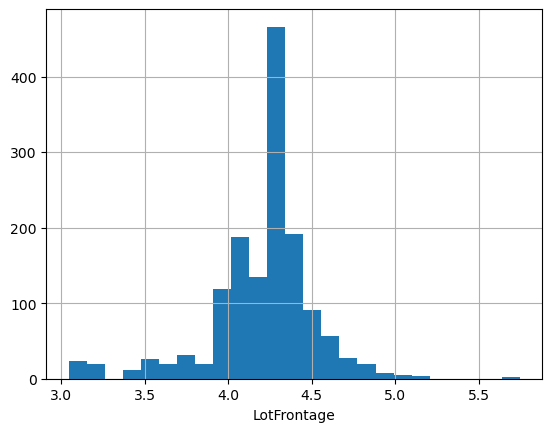

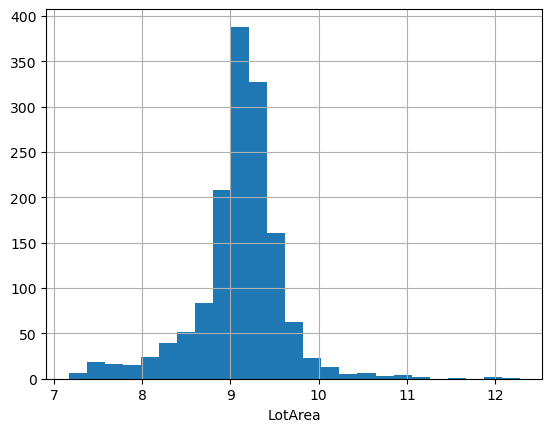

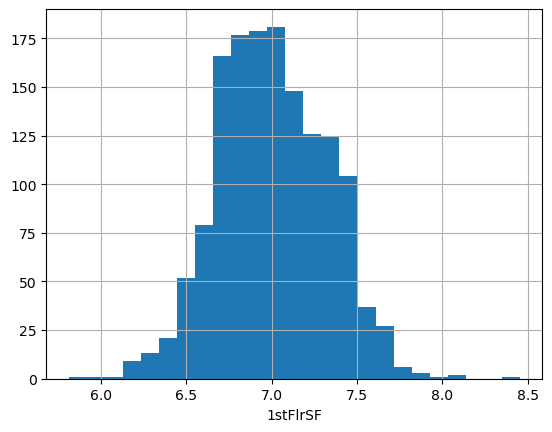

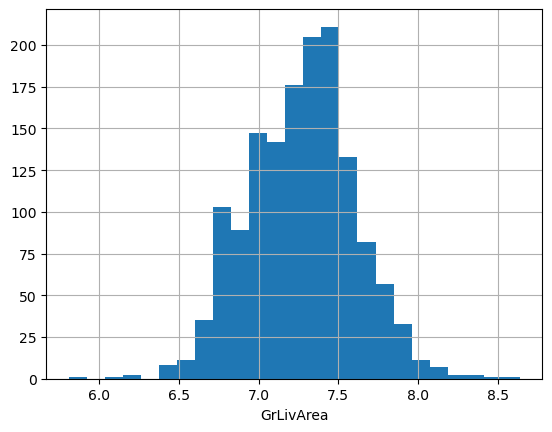

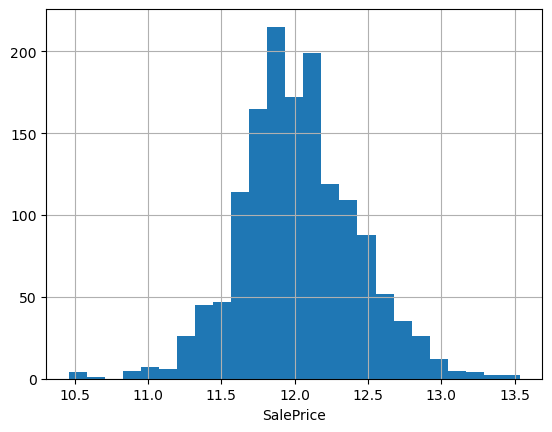

In [12]:
for xx in Cont_numerical_features:
    if 0 in data[xx].unique():
        pass
    else:
        data[xx]=np.log(data[xx])
        data[xx].hist(bins=25)
        plt.xlabel(xx)
        plt.show()

In [13]:
lb=LabelEncoder()
for xi in categorical_features:
    data[xi]=lb.fit_transform(data[xi])

data_scale=data.drop(['Id','SalePrice','LotFrontagenan','MasVnrAreanan','GarageYrBltnan'],axis=1)
Scaler=MinMaxScaler()
Scaler.fit(data_scale)
data_scale = pd.concat([data[['Id','SalePrice']],data_scale], axis=1)

In [15]:
data_scale

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,60,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,5.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,8,4
1,2,12.109011,20,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,31.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,8,4
2,3,12.317167,60,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,7.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,8,4
3,4,11.849398,70,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,8.0,3,3,642,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,8,0
4,5,12.429216,60,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,8.0,2,3,836,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,60,3,4.127134,8.976768,1,1,3,3,0,4,0,8,2,2,0,5,6,5,8,7,1,1,12,13,2,0.0,3,4,2,2,4,4,6,0,6,0,953,953,1,0,1,4,6.859615,694,0,7.406711,0,0,2,1,3,1,3,7,6,1,5,1,8.0,2,2,460,5,5,2,0,40,0,0,0,0,3,2,1,0,8,2007,8,4
1456,1457,12.254863,20,3,4.442651,9.486076,1,1,3,3,0,4,0,14,2,2,0,2,6,6,32,22,1,1,9,10,3,119.0,3,4,1,2,4,4,0,790,5,163,589,1542,1,4,1,4,7.636752,0,0,7.636752,1,0,2,0,3,1,3,7,2,2,5,1,32.0,3,2,500,5,5,2,349,0,0,0,0,0,3,3,1,0,2,2010,8,4
1457,1458,12.493130,70,3,4.189655,9.109636,1,1,3,3,0,4,0,6,2,2,0,5,7,9,69,4,1,1,5,5,2,0.0,0,2,4,4,1,4,2,275,6,0,877,1152,1,0,1,4,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,6,2,2,1,69.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4
1458,1459,11.864462,20,3,4.219508,9.181632,1,1,3,3,0,4,0,12,2,2,0,2,5,6,60,14,3,1,8,8,2,0.0,3,4,1,4,4,3,2,49,5,1029,0,1078,1,2,1,0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,6,0,3,1,60.0,3,1,240,5,5,2,366,0,112,0,0,0,3,2,1,0,4,2010,8,4


In [16]:
data_scale.to_csv('X_train_scaled.csv',index=False)